In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
final = pd.read_csv('../../data/final_permit_uncode.csv')
final.head()

,pdox_b1_id,elapsed_workdays,alias,Project_Status,job_class,Ward,green_floor_area,use_type,permit_type,PRICE,...,PRC,Plumbing_Review,QA_Review,Structural_Review,WASA_Review,WMATA_Review,White_House_Review,Zoning_Review,over_90,over_150
0,AN1700124,62.0,Addition Alteration Repair Permit,Approved,B,6.0,0.000000,R,Construction,6.209515,...,0.0,0.0,0.0,22.0,0.0,0.0,0.0,23.0,0,0
1,AN1700215,100.0,Addition Permit,Under Review,E,5.0,3.260071,R,Construction,5.525045,...,9.0,0.0,7.0,26.0,0.0,0.0,0.0,14.0,1,0
2,AN1700235,65.0,Addition Alteration Repair Permit,Approved,C,5.0,3.147367,C,Construction,5.755875,...,5.0,0.0,8.0,18.0,0.0,0.0,0.0,3.0,0,0
3,AN1700242,91.0,Addition Alteration Repair Permit,Approved,TPR,1.0,4.238508,C,Construction,5.705008,...,5.0,0.0,11.0,32.0,0.0,0.0,0.0,26.0,1,0
4,AN1700244,57.0,Addition Permit,Approved,E,2.0,2.389928,R,Construction,6.172507,...,1.0,0.0,6.0,18.0,0.0,0.0,0.0,21.0,0,0


In [5]:
final[['elapsed_workdays','over_150','Ward', 'EYFC','ReviewCycle']].agg(['mean', 'median','std','max','min']).round(2)

,elapsed_workdays,over_150,Ward,EYFC,ReviewCycle
mean,143.37,0.36,3.92,39.69,1.92
median,91.00,0.00,4.00,44.00,2.00
std,166.38,0.48,2.15,21.93,1.13
max,1262.00,1.00,8.00,133.00,8.00
min,0.00,0.00,1.00,-1.00,1.00


Describe the statistics for variables befor log

In [12]:
temp = final[['green_floor_area','PRICE','LIVING_GBA', 'LANDAREA']]
temp.head()

,green_floor_area,PRICE,LIVING_GBA,LANDAREA
0,0.000000,6.209515,3.399328,3.379124
1,3.260071,5.525045,3.049218,3.557146
2,3.147367,5.755875,3.225309,3.473487
3,4.238508,5.705008,3.164353,3.217747
4,2.389928,6.172507,3.300161,3.452247


In [44]:
pd.options.mode.chained_assignment = None
temp['green_floor_area'] = final['green_floor_area'].apply(lambda x: x**10)
temp['PRICE'] = final['PRICE'].apply(lambda x: x**10)
temp['LIVING_GBA'] = final['LIVING_GBA'].apply(lambda x: x**10)
temp['LANDAREA'] = final['LANDAREA'].apply(lambda x: x**10)

In [47]:
pd.set_option('display.float_format',lambda x : '%.2f' % x)
temp[['green_floor_area','PRICE','LIVING_GBA', 'LANDAREA']].agg(['mean', 'median','std','max','min']).round(2)

,green_floor_area,PRICE,LIVING_GBA,LANDAREA
mean,168128.88,347996724.44,6771209.58,1408529.04
median,0.00,62635826.33,207289.72,345815.91
std,1512620.92,542544077.74,12250665.33,2662588.93
max,51427233.33,2472606371.13,68324814.18,31780573.35
min,0.00,20510.70,0.00,0.00


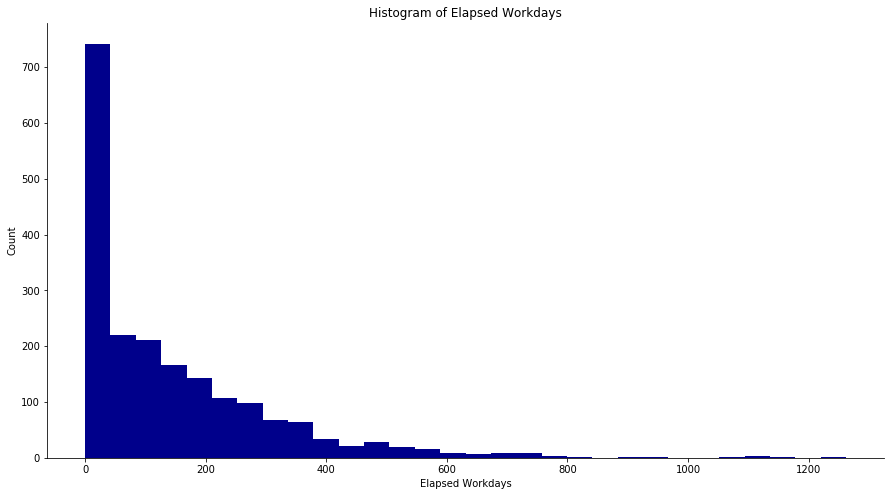

In [70]:
# plot for full sample size
plt.figure(figsize=(15, 8))
y = final['elapsed_workdays']
ax = plt.subplot()
ax.hist(y, color = 'darkblue', bins = 30)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
plt.xlabel('Elapsed Workdays')
plt.ylabel('Count')
plt.savefig('Histogram of Elapsed Workdays.png')
plt.title('Histogram of Elapsed Workdays')
plt.show()

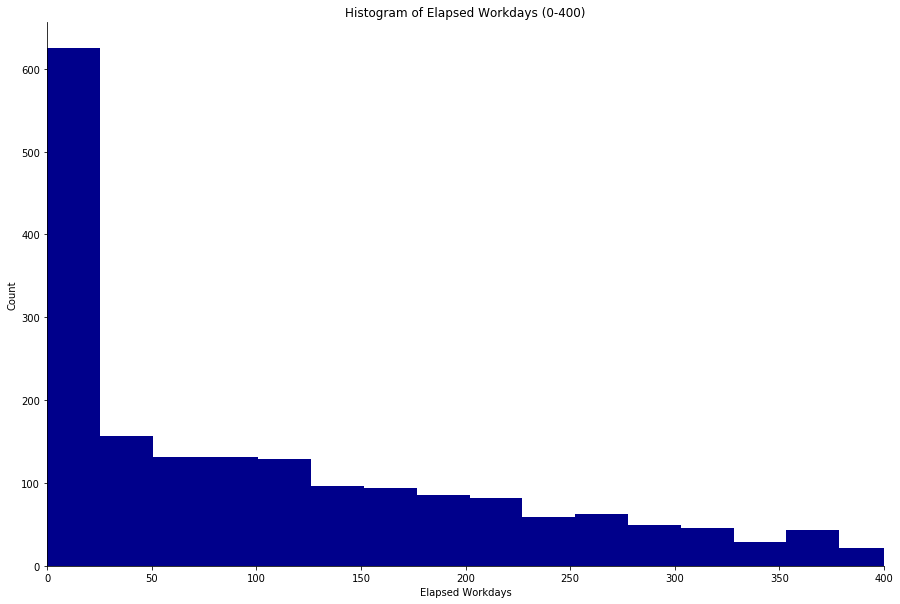

In [71]:
# plot for elaplsed workdays from 0 to 400
plt.figure(figsize=(15, 10))
y = final['elapsed_workdays']
ax = plt.subplot()
ax.hist(y, color = 'darkblue', bins = 50)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
plt.xlabel('Elapsed Workdays')
plt.ylabel('Count')
plt.xlim(0,400)
plt.savefig('Histogram of Elapsed Workdays (0-400).png')
plt.title('Histogram of Elapsed Workdays (0-400)')
plt.show()

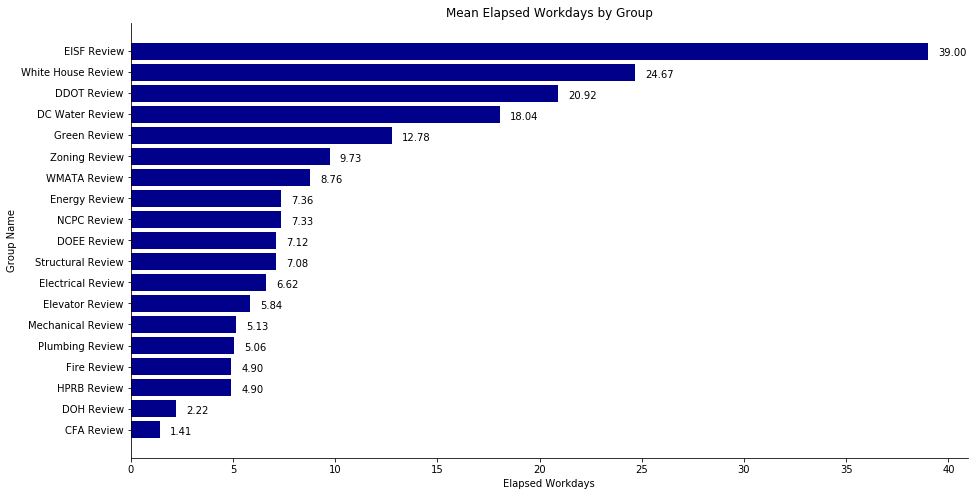

In [118]:
# plot
plt.figure(figsize=(15, 8))
ax = plt.subplot()
ax.barh(range(len(x)), x, color = 'darkblue')
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
plt.yticks(range(len(x)),['CFA Review','DOH Review','HPRB Review','Fire Review','Plumbing Review','Mechanical Review','Elevator Review','Electrical Review','Structural Review','DOEE Review','NCPC Review','Energy Review','WMATA Review','Zoning Review','Green Review','DC Water Review','DDOT Review','White House Review','EISF Review'])
plt.ylabel('Group Name')
plt.xlabel('Elapsed Workdays')
for a, b in enumerate(x):
    plt.text(b + 0.5, a - 0.1, '%.2f' % b, ha='left', va='center')
plt.title('Mean Elapsed Workdays by Group')
plt.savefig('Mean Elapsed Workdays by Group.png')
plt.show()

In [73]:
y = final.groupby('Ward')['elapsed_workdays'].mean()
y

Ward
1.00   151.23
2.00   140.10
3.00   135.16
4.00   147.43
5.00   163.72
6.00   140.11
7.00   186.59
8.00   103.35
Name: elapsed_workdays, dtype: float64

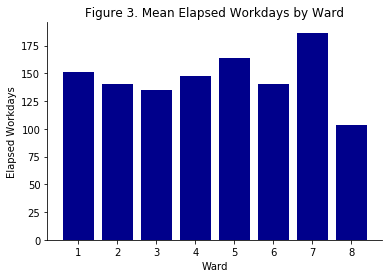

In [75]:
# plot
ax = plt.subplot()
ax.bar(range(len(y)), y, color = 'darkblue')
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
plt.xticks(range(len(y)),[1,2,3,4,5,6,7,8])
plt.xlabel('Ward')
plt.ylabel('Elapsed Workdays')

plt.title('Figure 3. Mean Elapsed Workdays by Ward')
plt.savefig('Mean Elapsed Workdays by Ward.png')
plt.show()